# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/uciml/iris](https://www.kaggle.com/datasets/uciml/iris)*

In [ ]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("iris_data.csv")
df

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


In [ ]:
# Schritt 2: Nutze .value_counts(), um die Häufigkeit jeder Klasse in der Spalte "Species" anzuzeigen.
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Daten aufteilen

In [ ]:
# Schritt 3: Weise die entsprechenden Features der Eingabevariable X und das zugehörige Ziel der Zielvariable y zu.
# Tipp: Verwende '.copy()' und '.pop()'.
X = df.copy()
y = X.pop("Species")

In [ ]:
X

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

# Schritt 4: Teile die Daten in Trainings- und Testdaten auf. Die Testdaten sollten 20% des Gesamtdatensatzes ausmachen und prozentual dieselbe Anzahl von Klassen wie die Trainingsdaten enthalten.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
# Schritt 5: Verwende .value_counts(), um den prozentualen Anteil jeder Klasse in y_train anzuzeigen.
y_train.value_counts() / len(y_train)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

In [ ]:
# Schritt 6: Verwende .value_counts(), um den prozentualen Anteil jeder Klasse in y_test anzuzeigen.
y_test.value_counts() / len(y_test)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

In [ ]:
# Schritt 7: Führe eine Analyse auf X_train mittels '.describe()' durch und beachte dabei vor allem den Minimal- und Maximalwert in jeder Spalte.
X_train.describe()

,SepalLengthCm,SepalWidthCm
count,120.000000,120.000000
mean,5.857500,3.045000
std,0.855006,0.444169
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [ ]:
# Schritt 8: Führe eine Analyse auf X_test mittels '.describe()' durch und beachte dabei vor allem den Minimal- und Maximalwert in jeder Spalte.
X_test.describe()

,SepalLengthCm,SepalWidthCm
count,30.000000,30.00000
mean,5.786667,3.09000
std,0.720504,0.39335
min,4.600000,2.40000
25%,5.100000,2.80000
50%,5.700000,3.10000
75%,6.300000,3.37500
max,7.200000,3.80000


# Daten skalieren

In [ ]:
from sklearn.preprocessing import StandardScaler

# Schritt 9: Erstelle eine Instanz eines StandardScalers und rufe '.fit()' auf X_train auf.
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [ ]:
# Schritt 10: Führe erneut eine Analyse auf 'X_train_scaled' mittels '.describe()' durch, um den Effekt von der Skalierung zu sehen.
X_train_scaled.describe()

,SepalLengthCm,SepalWidthCm
count,1.200000e+02,1.200000e+02
mean,-9.473903e-16,1.480297e-16
std,1.004193e+00,1.004193e+00
min,-1.829262e+00,-2.362575e+00
25%,-8.896731e-01,-5.539052e-01
50%,-6.753295e-02,-1.017377e-01
75%,6.371587e-01,5.765135e-01
max,2.398888e+00,3.063435e+00


In [ ]:
# Schritt 11: Führe erneut eine Analyse auf 'X_test_scaled' mittels '.describe()' durch, um den Effekt von der Skalierung zu sehen.
X_test_scaled.describe()

,SepalLengthCm,SepalWidthCm
count,30.000000,30.000000
mean,-0.083193,0.101738
std,0.846222,0.889300
min,-1.476916,-1.458240
25%,-0.889673,-0.553905
50%,-0.184982,0.124346
75%,0.519710,0.746076
max,1.576747,1.706932


# Trainingsdaten visualisieren

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

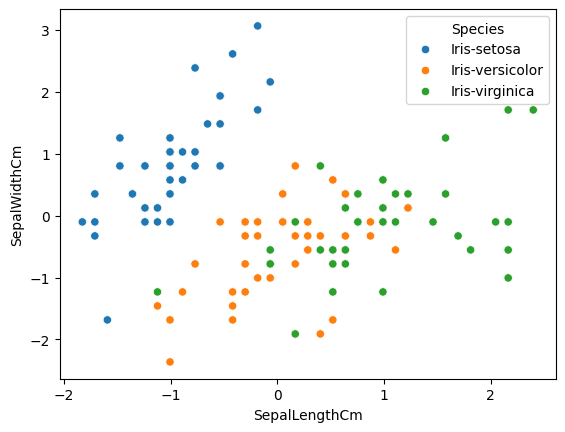

In [ ]:
import seaborn as sns

# Schritt 12: Führe diese Zelle aus, um die Trainingsdaten zu visualisieren.
sns.scatterplot(x=X_train_scaled["SepalLengthCm"], y=X_train_scaled["SepalWidthCm"], hue=y_train)

# KNN-Classifier - Hyperparameteroptimierung


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Schritt 13: Erstelle eine Instanz eines KNeighborsClassifiers und erstelle eine Liste mit verschiedenen Werten für den Hyperparameter 'n_neighbors'.
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8]
}

# Schritt 14: Setze bei GridSearchCV die Anzahl an Folds auf 4 und scoring auf "accuracy".
grid_search = GridSearchCV(model, param_grid, cv=4, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("Best Accuracy: ", grid_search.best_score_)
print("Best Parameter: ", grid_search.best_params_)

Best Accuracy:  0.8166666666666667
Best Parameter:  {'n_neighbors': 5}


In [ ]:
# Schritt 15: Speichere den besten KNeighborsClassifier in 'final_model' ab mithilfe von '.best_estimator_'
final_model = grid_search.best_estimator_

# KNN-Classifier - Entscheidungsgrenzen visualisieren

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


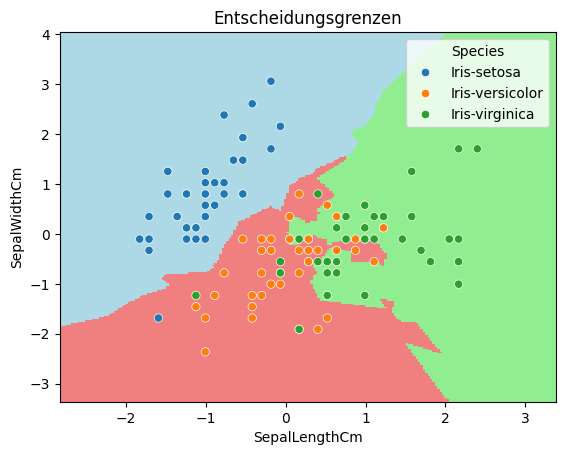

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# Schritt 16: Führe diese Zelle aus, um die Entscheidungsgrenzen des Modells und die Trainingsdaten zu visualisieren.
def plot_decision_boundaries(model, feature_1, feature_2, target):
    # Grenzen des Plots basierend auf den Merkmalen definieren
    x_min, x_max = feature_1.min() - 1, feature_1.max() + 1
    y_min, y_max = feature_2.min() - 1, feature_2.max() + 1

    # Ein Gitter von Punkten mit einem Abstand von 0.03 zwischen ihnen erstellen
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))

    # LabelEncoder initialisieren und die Vorhersagen des Modells transformieren
    le = LabelEncoder()
    Z = le.fit_transform(model.predict(np.c_[xx.ravel(), yy.ravel()]))

    # Form der Ausgabe anpassen
    Z = Z.reshape(xx.shape)

    # Hintergrund des Plots mit den Vorhersagen färben
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(["lightblue", "lightcoral", "lightgreen"]))

    # Scatterplot der tatsächlichen Datenpunkte
    sns.scatterplot(x=feature_1, y=feature_2, hue=target)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Beschriftung der Achsen und Titel
    plt.xlabel(feature_1.name)
    plt.ylabel(feature_2.name)
    plt.title("Entscheidungsgrenzen")

plot_decision_boundaries(final_model, X_train_scaled["SepalLengthCm"], X_train_scaled["SepalWidthCm"], y_train)

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Schritt 17: Generiere die Vorhersagen für 'X_test_scaled' und berechne damit die finale Accuracy basierend auf den Testdaten.
y_predict = final_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.6666666666666666


# Confusion Matrix

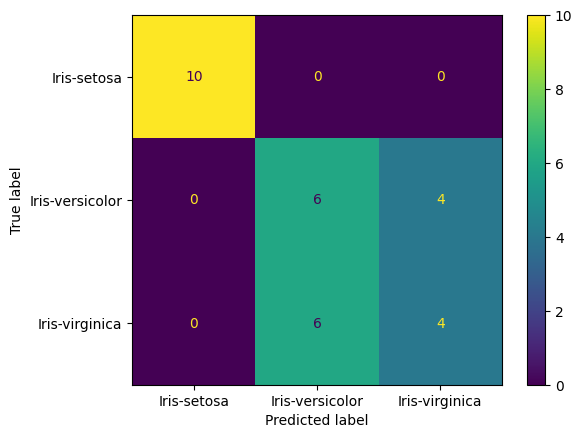

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Schritt 18: Erstelle eine Confusion Matrix basierend auf den Testdaten und den Vorhersagen, um detailliert zu analysieren, welche Fehler das Modell gemacht hat.
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


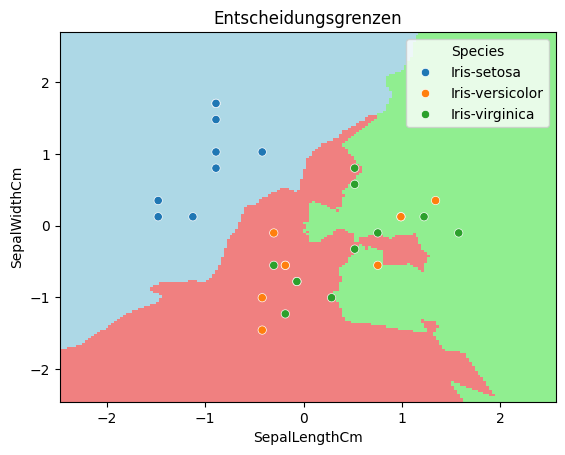

In [ ]:
# Schritt 19: Führe diese Zelle aus, um die Entscheidungsgrenzen des Modells und die Testsdaten zu visualisieren.
plot_decision_boundaries(final_model, X_test_scaled["SepalLengthCm"], X_test_scaled["SepalWidthCm"], y_test)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

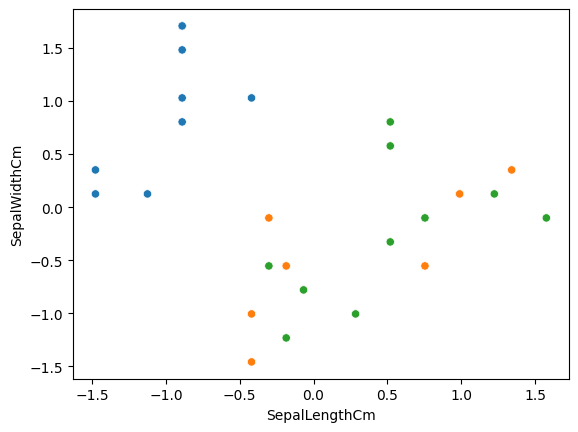

In [ ]:
sns.scatterplot(x=X_test_scaled["SepalLengthCm"], y=X_test_scaled["SepalWidthCm"], hue=y_test, legend=False)

In [ ]:
sum(y_test == "Iris-versicolor")

10

In [ ]:
X_test_scaled["SepalLengthCm"][y_test == "Iris-versicolor"]

55   -0.184982
90   -0.419879
81   -0.419879
88   -0.302430
54    0.754607
67   -0.067533
65    0.989504
50    1.341850
86    0.989504
99   -0.184982
Name: SepalLengthCm, dtype: float64

In [ ]:
X_test_scaled["SepalWidthCm"][y_test == "Iris-versicolor"]

55   -0.553905
90   -1.006073
81   -1.458240
88   -0.101738
54   -0.553905
67   -0.779989
65    0.124346
50    0.350430
86    0.124346
99   -0.553905
Name: SepalWidthCm, dtype: float64